In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/dataset/transfers.csv')
dataset = df[df['dir'] == 'in']
dataset

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70000,NL1,2021,w,385,Fortuna Sittard,Netherlands,in,140032,Andreas Samaris,32.0,...,515,Without Club,Without Club,NaN,1500000.0,False,False,False,False,3633188
70001,NL1,2021,w,306,SC Heerenveen,Netherlands,in,257808,Runar Espejord,25.0,...,1293,Tromsø IL,Norway,NaN,500000.0,False,True,True,False,3071862
70002,NL1,2021,w,306,SC Heerenveen,Netherlands,in,580142,Joaquín Fernández,22.0,...,37535,Montevideo City Torque,Uruguay,NaN,100000.0,False,True,True,False,3268245
70003,NL1,2021,w,468,Sparta Rotterdam,Netherlands,in,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,NaN,1000000.0,False,True,False,False,3619917


In [3]:
print('colonna player_age Nan -> ' , dataset['player_age'].isna().sum())
print('colonna transfer_fee_amnt Nan -> ' , dataset['transfer_fee_amnt'].isna().sum())
print('colonna market_val_amnt Nan -> ' , dataset['market_val_amnt'].isna().sum())
print('colonna team_name Nan -> ' , dataset['team_name'].isna().sum())
print('colonna counter_team_name Nan -> ' , dataset['counter_team_name'].isna().sum())
retired_rows = dataset[(dataset['team_id'] == 'Retired') | (dataset['counter_team_id'] == 'Retired')]
print('colonne team_id o counter_team_id Retired -> ', retired_rows.shape[0])
print('Numero di campioni in cui la colonna is_loan_ended è True ->', (dataset['is_loan_end'] == True).sum())
print('colonna league Nan -> ' , dataset['league'].isna().sum())
unique_leagues = dataset['league'].unique()
print('Valori unici nella colonna "league":', unique_leagues)



colonna player_age Nan ->  6
colonna transfer_fee_amnt Nan ->  18669
colonna market_val_amnt Nan ->  7523
colonna team_name Nan ->  0
colonna counter_team_name Nan ->  0
colonne team_id o counter_team_id Retired ->  2
Numero di campioni in cui la colonna is_loan_ended è True -> 8719
colonna league Nan ->  0
Valori unici nella colonna "league": ['GB1' 'ES1' 'IT1' 'L1' 'FR1' 'PO1' 'NL1']


In [4]:
# rimuovi i 6 player che non hanno età
dataset.dropna(subset=['player_age'], inplace=True)
# sostituisci i valori di trasferimento Nan con 0
dataset['transfer_fee_amnt'].fillna(0, inplace=True)
# sostituisci i valori di valore di mercato Nan con 0
dataset['market_val_amnt'].fillna(0, inplace=True)
# rimuovi i trasferimenti senza squadra di destinazione (ovvero svincoli)
dataset = dataset[dataset['counter_team_name'] != 'Without Club'] 
# rimuovi i trasferimenti senza squadra di provenienza (ovvero ingaggio di svincolati)
dataset = dataset[dataset['team_name'] != 'Without Club']
# Rimuovi le righe in cui 'team_id' o 'counter_team_id' sono uguali a 'Retired'
dataset = dataset[(dataset['team_id'] != 'Retired') & (dataset['counter_team_id'] != 'Retired')]
# Rimozione dei rientri dal prestito (is_loan_end = True)
dataset = dataset[dataset['is_loan_end'] == False]

# Conversione dei valori di 'team_id' e 'counter_team_id' in interi
dataset['team_id'] = dataset['team_id'].astype(int)
dataset['counter_team_id'] = dataset['counter_team_id'].astype(int)


print('Il dataset è composto da ', dataset.shape[0], ' trasferimenti')

Il dataset è composto da  22696  trasferimenti


/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_5564/3190214965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['player_age'], inplace=True)
/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_5564/3190214965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['transfer_fee_amnt'].fillna(0, inplace=True)
/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_5564/3190214965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [5]:
# Seleziona gli id del team e del counter_team
unique_team = dataset['team_id'].unique()
unique_counter_team = dataset['counter_team_id'].unique()
team_set = set(unique_team)
counter_team_set = set(unique_counter_team)

# Seleziona tutti gli id che sono in counter ma non in team (se non sono in team vuol dire che non conosciamo la lega)
difference_set = counter_team_set - team_set

dataset = dataset[~dataset['counter_team_id'].isin(difference_set)]

club_league_mapping = dict(zip(dataset['team_id'], dataset['league']))

In [6]:
G = nx.MultiDiGraph()

for index, row in dataset.iterrows():
    player_name = row['player_name']
    
    # Utilizza l'ID della squadra come identificatore del nodo
    team1 = row['team_id']
    team2 = row['counter_team_id']
    
    # Ottieni le leghe corrispondenti ai team dalla mappa
    league_team1 = club_league_mapping.get(team1, None)
    league_team2 = club_league_mapping.get(team2, None)
    
    # Aggiungi i nodi se non esistono già
    if not G.has_node(league_team1):
        G.add_node(league_team1, label='league')
    if not G.has_node(league_team2):
        G.add_node(league_team2, label='league')
    
    transfer_attributes = {
        'transfer_id': row['transfer_id'],
        'player_id': row['player_id'],
        'player_name': row['player_name'],
        'player_age': row['player_age'],
        'season': row['season'],
        'window': row['window'],
        'transfer_fee_amnt': row['transfer_fee_amnt'],
        'is_loan': row['is_loan'],
        'market_val_amnt': row['market_val_amnt']
    }
    
    G.add_edge(league_team2, league_team1, label='transfer', **transfer_attributes) 

print('Numero di nodi:', G.number_of_nodes())
print('Numero di archi:', G.number_of_edges())
# Calcola la densità della rete
density = nx.density(G)

print(f"Densità della rete: {density}")


Numero di nodi: 7
Numero di archi: 11697
Densità della rete: 278.5


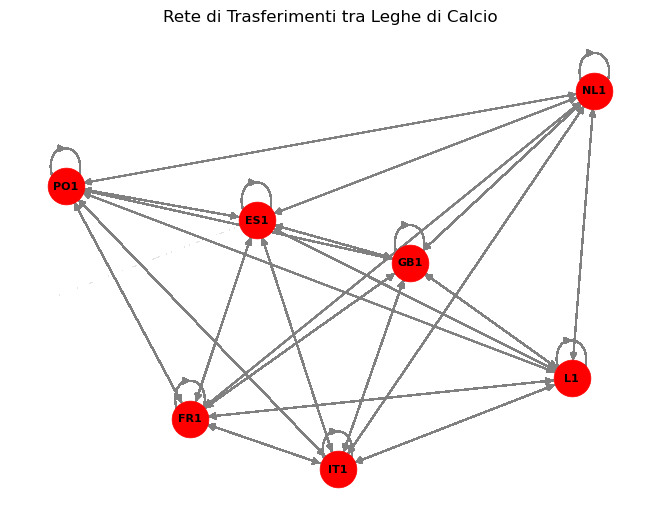

In [7]:
# Layout per la visualizzazione
pos = nx.spring_layout(G)

# Etichette delle leghe
labels = {node: node for node in G.nodes()}

# Visualizzazione del grafo
nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold', node_color='red', node_size=700, edge_color='gray', linewidths=0.5, font_size=8)
plt.show()


Centralità della lega IT1: 977.0
Centralità della lega GB1: 585.3333333333333
Centralità della lega ES1: 576.6666666666666
Centralità della lega FR1: 492.3333333333333
Centralità della lega PO1: 472.3333333333333
Centralità della lega L1: 423.0
Centralità della lega NL1: 372.3333333333333


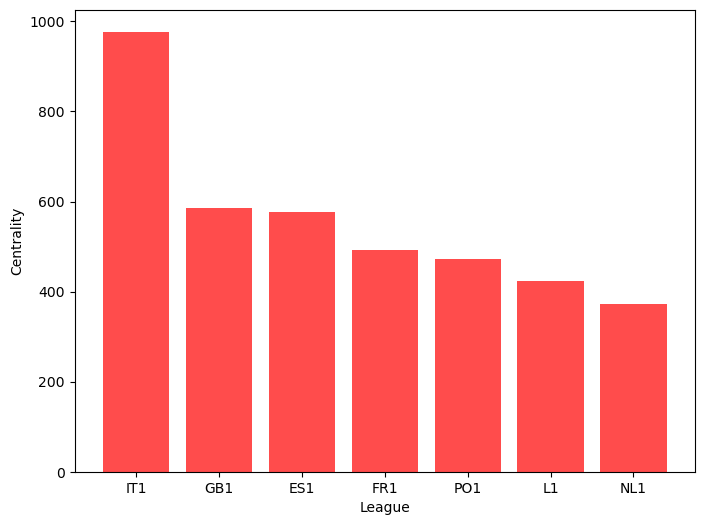

In [13]:
# Calcola la centralità dei nodi delle leghe
league_centrality = nx.degree_centrality(G)

# Ordina il dizionario della centralità in base ai valori
sorted_centrality = dict(sorted(league_centrality.items(), key=lambda item: item[1], reverse=True))

# Visualizza le leghe in ordine di centralità
for league, centrality in sorted_centrality.items():
    print(f"Centralità della lega {league}: {centrality}")

# Visualizza il grafico della centralità delle leghe
plt.bar(sorted_centrality.keys(), sorted_centrality.values(), color='red', alpha=0.7)
plt.xlabel('League')
plt.ylabel('Centrality')

# Rendi il grafico più piccolo
plt.gcf().set_size_inches(8, 6)

plt.show()



Centralità di betweenness della lega GB1: 0.0
Centralità di betweenness della lega FR1: 0.0
Centralità di betweenness della lega IT1: 0.0
Centralità di betweenness della lega NL1: 0.0
Centralità di betweenness della lega ES1: 0.0
Centralità di betweenness della lega PO1: 0.0
Centralità di betweenness della lega L1: 0.0


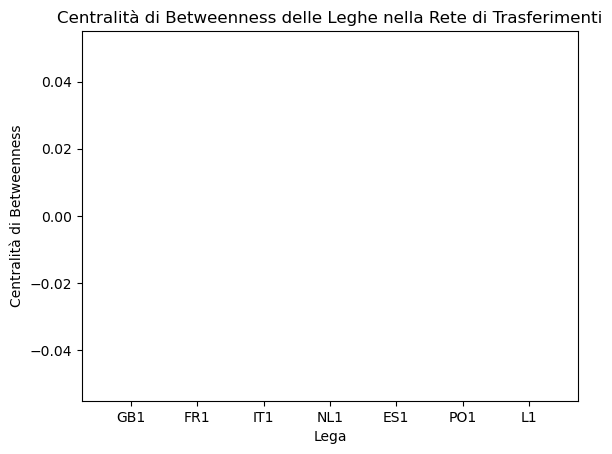

In [35]:
# Calcola la centralità di betweenness dei nodi delle leghe
league_betweenness = nx.betweenness_centrality(G)

# Ordina il dizionario della centralità in base ai valori
sorted_betweenness = dict(sorted(league_betweenness.items(), key=lambda item: item[1], reverse=True))

# Visualizza le leghe in ordine di centralità di betweenness
for league, betweenness in sorted_betweenness.items():
    print(f"Centralità di betweenness della lega {league}: {betweenness}")

# Visualizza il grafico della centralità di betweenness delle leghe
plt.bar(sorted_betweenness.keys(), sorted_betweenness.values())
plt.xlabel('Lega')
plt.ylabel('Centralità di Betweenness')
plt.title('Centralità di Betweenness delle Leghe nella Rete di Trasferimenti')
plt.show()

# RISULTA A 0 PER TUTTE LE LEGHE A CAUSA DELLA FORTE DENSITà DELLA RETE 

Centralità di vicinanza della lega GB1: 1.0
Centralità di vicinanza della lega FR1: 1.0
Centralità di vicinanza della lega IT1: 1.0
Centralità di vicinanza della lega NL1: 1.0
Centralità di vicinanza della lega ES1: 1.0
Centralità di vicinanza della lega PO1: 1.0
Centralità di vicinanza della lega L1: 1.0


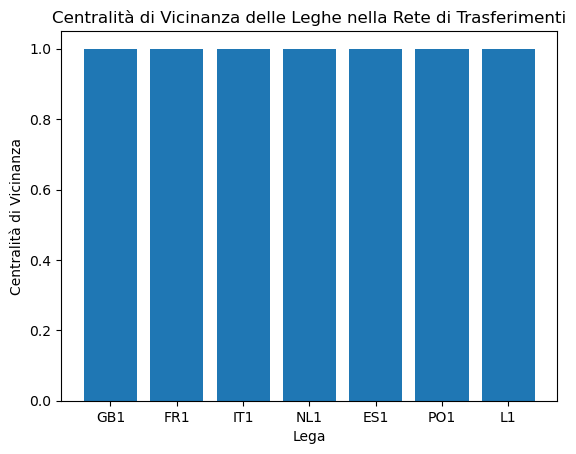

La rete è fortemente connessa: True


In [53]:
# Calcola la centralità di vicinanza dei nodi delle leghe
league_closeness = nx.closeness_centrality(G)

# Ordina il dizionario della centralità in base ai valori
sorted_closeness = dict(sorted(league_closeness.items(), key=lambda item: item[1], reverse=True))

# Visualizza le leghe in ordine di centralità di vicinanza
for league, closeness in sorted_closeness.items():
    print(f"Centralità di vicinanza della lega {league}: {closeness}")

# Visualizza il grafico della centralità di vicinanza delle leghe
plt.bar(sorted_closeness.keys(), sorted_closeness.values())
plt.xlabel('Lega')
plt.ylabel('Centralità di Vicinanza')
plt.title('Centralità di Vicinanza delle Leghe nella Rete di Trasferimenti')
plt.show()

# VALORI TUTTI 1 A CAUSA DELLA FORTE CONNETTIVITà NELLA RETE

is_connected = nx.is_strongly_connected(G)
print(f"La rete è fortemente connessa: {is_connected}")


Centralità di Katz della lega GB1: 0.37796447300922725
Centralità di Katz della lega FR1: 0.37796447300922725
Centralità di Katz della lega IT1: 0.37796447300922725
Centralità di Katz della lega NL1: 0.37796447300922725
Centralità di Katz della lega ES1: 0.37796447300922725
Centralità di Katz della lega PO1: 0.37796447300922725
Centralità di Katz della lega L1: 0.37796447300922725


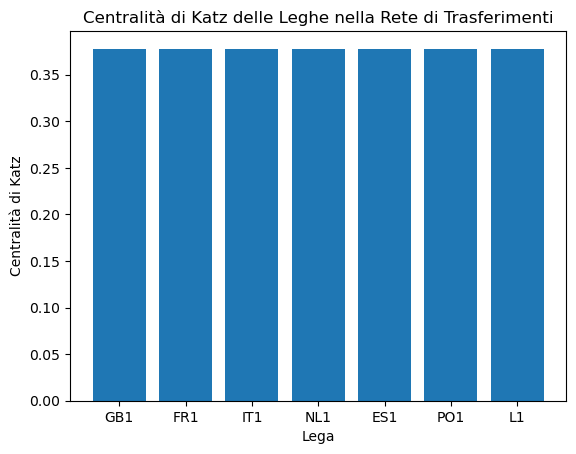

In [44]:
net_standard = nx.Graph(G)

# Calcola la centralità di Katz dei nodi delle leghe
league_katz_centrality = nx.katz_centrality(net_standard, alpha=0.1)

# Ordina il dizionario della centralità in base ai valori
sorted_katz_centrality = dict(sorted(league_katz_centrality.items(), key=lambda item: item[1], reverse=True))

# Visualizza le leghe in ordine di centralità di Katz
for league, katz_centrality in sorted_katz_centrality.items():
    print(f"Centralità di Katz della lega {league}: {katz_centrality}")

# Visualizza il grafico della centralità di Katz delle leghe
plt.bar(sorted_katz_centrality.keys(), sorted_katz_centrality.values())
plt.xlabel('Lega')
plt.ylabel('Centralità di Katz')
plt.title('Centralità di Katz delle Leghe nella Rete di Trasferimenti')
plt.show()


In [61]:
# CLASSIFICA LEGHE CHE HANNO FATTO PIU ACQUISTI (ARCHI IN ENTRATA)

# Calcola il grado in ingresso per ciascun nodo
in_degrees = dict(G.in_degree())

# Ordina i nodi in base ai gradi in ingresso in ordine decrescente
sorted_in_degrees = dict(sorted(in_degrees.items(), key=lambda item: item[1], reverse=True))

# Stampa i gradi in ingresso ordinati in ordine decrescente
for node, in_degree in sorted_in_degrees.items():
    print(f"Nodo {node}: Grado in ingresso = {in_degree}")


Nodo IT1: Grado in ingresso = 2947
Nodo ES1: Grado in ingresso = 1824
Nodo GB1: Grado in ingresso = 1634
Nodo FR1: Grado in ingresso = 1437
Nodo PO1: Grado in ingresso = 1415
Nodo L1: Grado in ingresso = 1234
Nodo NL1: Grado in ingresso = 1206


In [62]:
# CLASSIFICA LEGHE CHE HANNO FATTO PIU CESSIONI (ARCHI IN USCITA)

# Calcola il grado in uscita per ciascun nodo
out_degrees = dict(G.out_degree())

# Ordina i nodi in base ai gradi in uscita in ordine decrescente
sorted_out_degrees = dict(sorted(out_degrees.items(), key=lambda item: item[1], reverse=True))

# Stampa i gradi in uscita ordinati in ordine decrescente
for node, out_degree in sorted_out_degrees.items():
    print(f"Nodo {node}: Grado in uscita = {out_degree}")


Nodo IT1: Grado in uscita = 2915
Nodo GB1: Grado in uscita = 1878
Nodo ES1: Grado in uscita = 1636
Nodo FR1: Grado in uscita = 1517
Nodo PO1: Grado in uscita = 1419
Nodo L1: Grado in uscita = 1304
Nodo NL1: Grado in uscita = 1028


In [64]:
# CLASSIFICA LEGHE CHE HANNO SPESO DI PIU

# Inizializza un dizionario per la somma dei valori di transfer_fee_amnt per gli archi entranti di ogni nodo
total_transfer_fees = {}

# Itera su ciascun nodo
for node in G.nodes():
    # Ottieni tutti gli archi entranti per il nodo corrente
    in_edges = G.in_edges(node, data=True)
    
    # Calcola la somma dei valori di transfer_fee_amnt per gli archi entranti
    total_fee = sum(edge[2]['transfer_fee_amnt'] for edge in in_edges)
    
    # Aggiungi il risultato al dizionario
    total_transfer_fees[node] = total_fee

# Ordina il dizionario in base ai valori (somme di transfer_fee_amnt) in ordine decrescente
sorted_total_transfer_fees = dict(sorted(total_transfer_fees.items(), key=lambda item: item[1], reverse=True))

# Stampa la somma dei valori di transfer_fee_amnt per gli archi entranti di ogni nodo in ordine decrescente
for node, total_fee in sorted_total_transfer_fees.items():
    print(f"Nodo {node}: Somma dei valori di transfer_fee_amnt per gli archi entranti = {total_fee}")


Nodo GB1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 14070323000.0
Nodo IT1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 10953803000.0
Nodo ES1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 6527625000.0
Nodo L1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 4256725000.0
Nodo FR1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 4209955000.0
Nodo PO1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 808606000.0
Nodo NL1: Somma dei valori di transfer_fee_amnt per gli archi entranti = 502417000.0


In [65]:
# CLASSIFICA LEGHE CHE HANNO INCASSATO DI PIU


# Inizializza un dizionario per la somma dei valori di transfer_fee_amnt per gli archi in uscita di ogni nodo
total_transfer_fees_out = {}

# Itera su ciascun nodo
for node in G.nodes():
    # Ottieni tutti gli archi in uscita per il nodo corrente
    out_edges = G.out_edges(node, data=True)
    
    # Calcola la somma dei valori di transfer_fee_amnt per gli archi in uscita
    total_fee_out = sum(edge[2]['transfer_fee_amnt'] for edge in out_edges)
    
    # Aggiungi il risultato al dizionario
    total_transfer_fees_out[node] = total_fee_out

# Ordina il dizionario in base ai valori (somme di transfer_fee_amnt) in ordine decrescente
sorted_total_transfer_fees_out = dict(sorted(total_transfer_fees_out.items(), key=lambda item: item[1], reverse=True))

# Stampa la somma dei valori di transfer_fee_amnt per gli archi in uscita di ogni nodo in ordine decrescente
for node, total_fee_out in sorted_total_transfer_fees_out.items():
    print(f"Nodo {node}: Somma dei valori di transfer_fee_amnt per gli archi in uscita = {total_fee_out}")


Nodo IT1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 11103943000.0
Nodo GB1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 8887294000.0
Nodo ES1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 6613341000.0
Nodo FR1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 5345392000.0
Nodo L1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 4954130000.0
Nodo PO1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 2575456000.0
Nodo NL1: Somma dei valori di transfer_fee_amnt per gli archi in uscita = 1849898000.0


In [66]:
# CLASSIFICA LEGHE CHE HANNO MOSSO PIU SOLDI


# Inizializza un dizionario per la somma dei valori di transfer_fee_amnt per gli archi in entrata e in uscita di ogni nodo
total_transfer_fees_both = {}

# Itera su ciascun nodo
for node in G.nodes():
    # Ottieni tutti gli archi in entrata per il nodo corrente
    in_edges = G.in_edges(node, data=True)
    
    # Ottieni tutti gli archi in uscita per il nodo corrente
    out_edges = G.out_edges(node, data=True)
    
    # Calcola la somma dei valori di transfer_fee_amnt per gli archi in entrata
    total_fee_in = sum(edge[2]['transfer_fee_amnt'] for edge in in_edges)
    
    # Calcola la somma dei valori di transfer_fee_amnt per gli archi in uscita
    total_fee_out = sum(edge[2]['transfer_fee_amnt'] for edge in out_edges)
    
    # Calcola la somma totale
    total_fee_both = total_fee_in + total_fee_out
    
    # Aggiungi il risultato al dizionario
    total_transfer_fees_both[node] = total_fee_both

# Ordina il dizionario in base ai valori (somme di transfer_fee_amnt) in ordine decrescente
sorted_total_transfer_fees_both = dict(sorted(total_transfer_fees_both.items(), key=lambda item: item[1], reverse=True))

# Stampa la somma dei valori di transfer_fee_amnt per entrambi gli archi di ogni nodo in ordine decrescente
for node, total_fee_both in sorted_total_transfer_fees_both.items():
    print(f"Nodo {node}: Somma dei valori di transfer_fee_amnt per entrambi gli archi = {total_fee_both}")


Nodo GB1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 22957617000.0
Nodo IT1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 22057746000.0
Nodo ES1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 13140966000.0
Nodo FR1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 9555347000.0
Nodo L1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 9210855000.0
Nodo PO1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 3384062000.0
Nodo NL1: Somma dei valori di transfer_fee_amnt per entrambi gli archi = 2352315000.0


In [75]:
# TRASFERIMENTI PER OGNI COPPIA DI LEGHE 

from collections import defaultdict

# Inizializza un dizionario per tenere traccia del numero di archi per ogni coppia di nodi
edge_count_dict = defaultdict(int)

# Itera attraverso tutti gli archi nella rete
for edge in G.edges():
    # Ordina i nodi all'interno della coppia in modo da considerarli equivalenti indipendentemente dall'ordine
    sorted_edge = tuple(sorted(edge))
    
    # Aggiorna il conteggio per la coppia di nodi
    edge_count_dict[sorted_edge] += 1

# Crea una lista ordinata in base al numero di archi (in ordine decrescente)
sorted_edge_count = sorted(edge_count_dict.items(), key=lambda x: x[1], reverse=True)

# Stampa la classifica delle coppie di nodi per il numero di archi
print("Classifica delle coppie di nodi per il numero di archi:")
for (node1, node2), count in sorted_edge_count:
    print(f"Coppia: ({node1}, {node2}), Numero di archi: {count}")


Classifica delle coppie di nodi per il numero di archi:
Coppia: (IT1, IT1), Numero di archi: 2272
Coppia: (PO1, PO1), Numero di archi: 1020
Coppia: (ES1, ES1), Numero di archi: 979
Coppia: (GB1, GB1), Numero di archi: 912
Coppia: (FR1, FR1), Numero di archi: 905
Coppia: (L1, L1), Numero di archi: 809
Coppia: (NL1, NL1), Numero di archi: 794
Coppia: (ES1, GB1), Numero di archi: 435
Coppia: (ES1, IT1), Numero di archi: 371
Coppia: (FR1, GB1), Numero di archi: 335
Coppia: (GB1, IT1), Numero di archi: 319
Coppia: (ES1, PO1), Numero di archi: 279
Coppia: (GB1, L1), Numero di archi: 251
Coppia: (FR1, IT1), Numero di archi: 246
Coppia: (GB1, NL1), Numero di archi: 219
Coppia: (ES1, FR1), Numero di archi: 207
Coppia: (L1, NL1), Numero di archi: 177
Coppia: (ES1, L1), Numero di archi: 152
Coppia: (FR1, PO1), Numero di archi: 151
Coppia: (FR1, L1), Numero di archi: 149
Coppia: (IT1, PO1), Numero di archi: 145
Coppia: (IT1, L1), Numero di archi: 138
Coppia: (GB1, PO1), Numero di archi: 129
Coppia

In [76]:
# ETA MEDIA DEGLI ACQUISTI PER OGNI LEGA

# Inizializza un dizionario per la media di player_age per ogni nodo
average_player_age = {}

# Itera su ciascun nodo
for node in G.nodes():
    # Ottieni tutti gli archi entranti per il nodo corrente
    in_edges = G.in_edges(node, data=True)
    
    # Calcola la media di player_age per gli archi entranti
    if len(in_edges) > 0:
        average_age = sum(edge[2]['player_age'] for edge in in_edges) / len(in_edges)
    else:
        average_age = 0  # Se non ci sono archi entranti, imposta la media a 0
    
    # Aggiungi il risultato al dizionario
    average_player_age[node] = average_age

# Ordina il dizionario in base ai valori (medie di player_age) in ordine decrescente
sorted_average_player_age = dict(sorted(average_player_age.items(), key=lambda item: item[1], reverse=True))

# Stampa la media di player_age per ogni nodo in ordine decrescente
for node, average_age in sorted_average_player_age.items():
    print(f"Nodo {node}: Media di player_age per gli archi entranti = {average_age}")


Nodo ES1: Media di player_age per gli archi entranti = 25.57236842105263
Nodo GB1: Media di player_age per gli archi entranti = 25.569767441860463
Nodo IT1: Media di player_age per gli archi entranti = 25.445198506956228
Nodo FR1: Media di player_age per gli archi entranti = 24.96311760612387
Nodo PO1: Media di player_age per gli archi entranti = 24.830388692579504
Nodo L1: Media di player_age per gli archi entranti = 24.60615883306321
Nodo NL1: Media di player_age per gli archi entranti = 24.130182421227197


In [77]:
# ETA MEDIA DELLE CESSIONI PER OGNI LEGA


# Inizializza un dizionario per la media di player_age per ogni nodo
average_player_age_out = {}

# Itera su ciascun nodo
for node in G.nodes():
    # Ottieni tutti gli archi in uscita per il nodo corrente
    out_edges = G.out_edges(node, data=True)
    
    # Calcola la media di player_age per gli archi in uscita
    if len(out_edges) > 0:
        average_age = sum(edge[2]['player_age'] for edge in out_edges) / len(out_edges)
    else:
        average_age = 0  # Se non ci sono archi in uscita, imposta la media a 0
    
    # Aggiungi il risultato al dizionario
    average_player_age_out[node] = average_age

# Ordina il dizionario in base ai valori (medie di player_age) in ordine decrescente
sorted_average_player_age_out = dict(sorted(average_player_age_out.items(), key=lambda item: item[1], reverse=True))

# Stampa la media di player_age per ogni nodo in ordine decrescente basandoti sugli archi in uscita
for node, average_age in sorted_average_player_age_out.items():
    print(f"Nodo {node}: Media di player_age per gli archi in uscita = {average_age}")


Nodo ES1: Media di player_age per gli archi in uscita = 25.649755501222494
Nodo GB1: Media di player_age per gli archi in uscita = 25.628860489882854
Nodo IT1: Media di player_age per gli archi in uscita = 25.374957118353343
Nodo L1: Media di player_age per gli archi in uscita = 24.92484662576687
Nodo PO1: Media di player_age per gli archi in uscita = 24.790697674418606
Nodo FR1: Media di player_age per gli archi in uscita = 24.557679630850362
Nodo NL1: Media di player_age per gli archi in uscita = 24.21011673151751


In [ ]:
# QUI SI POTREBBE PENSARE DI FARE UNO STUDIO PER PERIODI (AD ESEMPIO OGNI DUE ANNI) PER VEDERE SE CI SONO CAMBIAMENTI NELLE CLASSIFICHE